In [340]:
%matplotlib inline
import math
import time
import numpy as np
import matplotlib.pyplot as plt
import random


In [341]:
def normal(data, mu, sigma):
    y_noise = [y_ + random.gauss(mu, sigma) for y_ in data]
    std_y = y_noise - data
    return np.array(y_noise), std_y


def get_data(nodes, mu, var, sub, func):
    x = np.arange(0.0, sub, sub / nodes)
    y = np.array([func(x_) for x_ in x])
    y_noise, sub_y = normal(y, mu, var)
    return x, y, y_noise, sub_y

In [342]:
nodes = 50
mu = 0
var = 0.02


def p_1(x_):
    return np.sin(x_ ** 2 + 1)



In [343]:
def gaussian(x, mu, var):
    # return (1 / (np.sqrt(2 * np.pi * var))) * np.exp(-(((x - mu) ** 2) / (2 * var)))
    return np.exp(-((x - mu) ** 2 / (2 * var)))


def sigmoid(x, mu, var):
    return 1 / (1 + np.exp(-(x - mu) / np.sqrt(var)))


def mle_mine(m, x, Y, var, func, sub_range):
    sub_mu = sub_range / m
    X = np.array([[func(x_, sub_mu * i, var) for i in range(m)] for x_ in x])
    X[:, 0] = 1
    w_ = np.linalg.inv(X.T @ X) @ X.T @ Y
    return w_, X


def full_bayesian_mine(m, alpha, x, Y, var, func, sub_range):
    sub_mu = sub_range / m
    X = np.array([[func(x_, sub_mu * i, var) for i in range(m)] for x_ in x])
    X[:, 0] = 1
    # Y = Y.reshape(1, -1)
    ss = np.linalg.inv((X.T @ X / var + alpha * np.identity(m))) * (1 / var)
    w_ = ss @ X.T @ Y
    return w_, X, ss


def squared_loss(y_hat, y):
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2

In [344]:
m = 10
alpha = 0.5
x, y_origin, y_noise, _ = get_data(nodes, mu, var, 1.0, p_1)

w_, X = mle_mine(m, x, y_noise, var, gaussian, 1.0)
y_ = X @ w_
err = squared_loss(y_, y_noise)
print(err.sum())

0.010546632288482244


In [345]:
def display(m, alpha, x, y_, y_origin, y_noise, line_name, origin_func):
    fig, ax = plt.subplots()
    line1, = ax.plot(x, y_origin, color='red', label=f'{origin_func}')
    line2, = ax.plot(x, y_, color='blue', label=f'{line_name}: m={m}, alpha={alpha}')
    ax.legend()
    # ax.set_title('Linear and Quadratic Functions')
    ax.set_xlabel('x')
    ax.set_ylabel('y')

    plt.scatter(x, y_noise, color='green')
    plt.show()


w:  [ 0.57982587  0.6849942  -1.20765725  1.9443498  -2.15667013  2.57146395
 -2.36500786  2.29486017 -1.37713269  0.82547319]


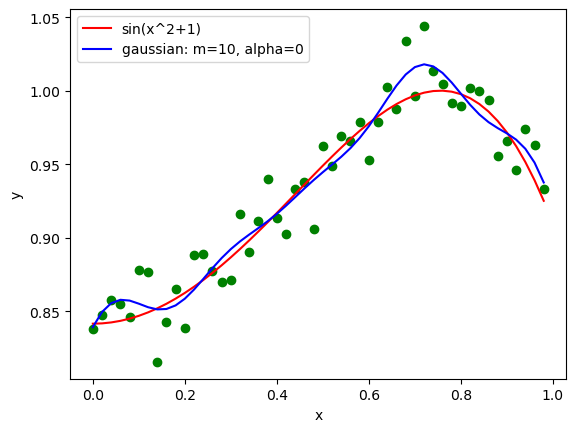

w:  [ 0.80816611  0.07343726 -0.07041691  0.04876387  0.08663067 -0.04266969
  0.05683809  0.15375347 -0.05919676  0.14825117]


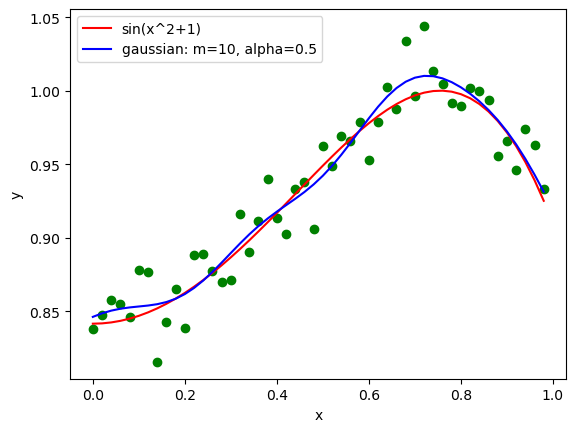

w:  [ 0.76852181  0.1018833  -0.05517204  0.05501714  0.07593163 -0.0028651
  0.07827626  0.11143418 -0.00201456  0.15755439]


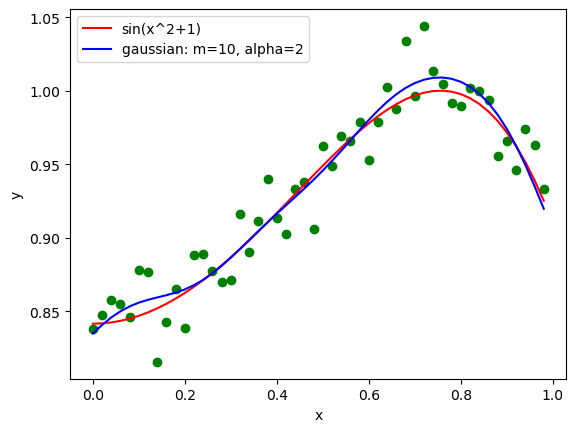

In [346]:
x, y_origin, y_noise, _ = get_data(nodes, mu, var, 1.0, p_1)
params = [(10, 0), (10, 0.5), (10, 2)]

for m, al in params:
    w_, X, _ = full_bayesian_mine(m, al, x, y_noise, var, gaussian, 1.0)
    y_ = X @ w_
    print("w: ", w_)
    display(m, al, x, y_, y_origin, y_noise, 'gaussian', 'sin(x^2+1)')


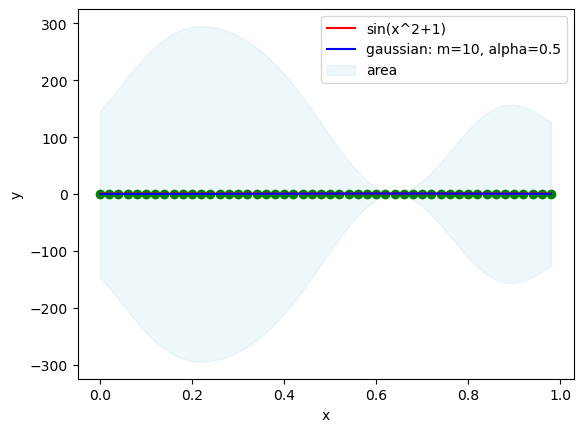

[32]
0


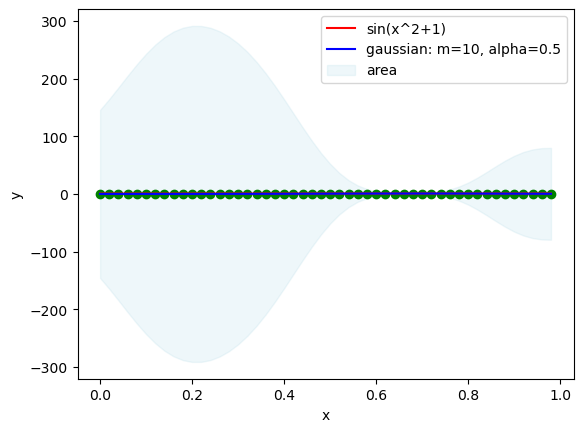

[32, 35]
1


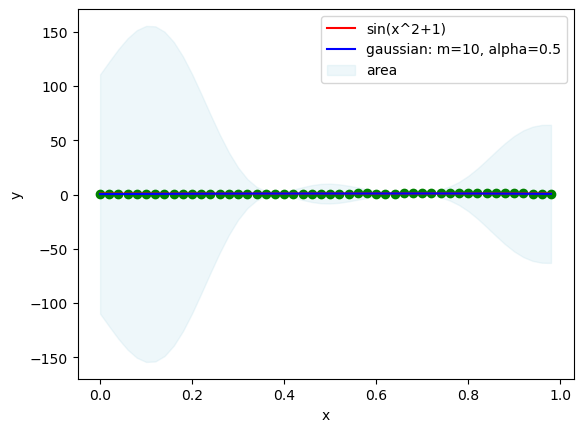

[32, 35, 19]
2


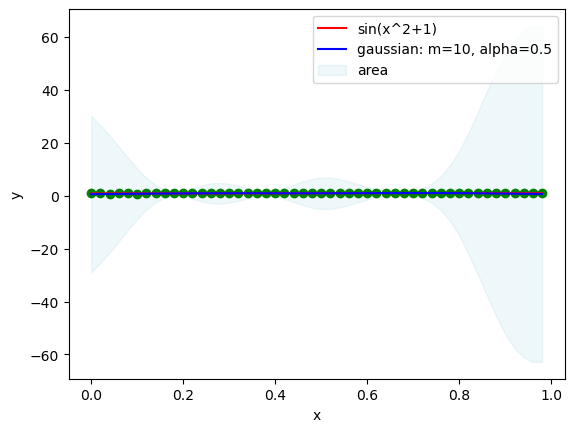

[32, 35, 19, 9]
3


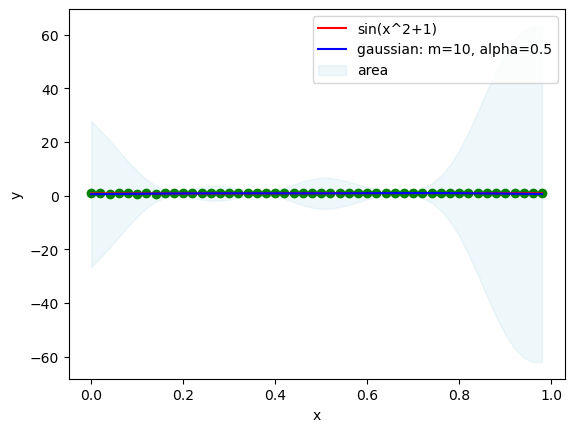

[32, 35, 19, 9, 18]
4


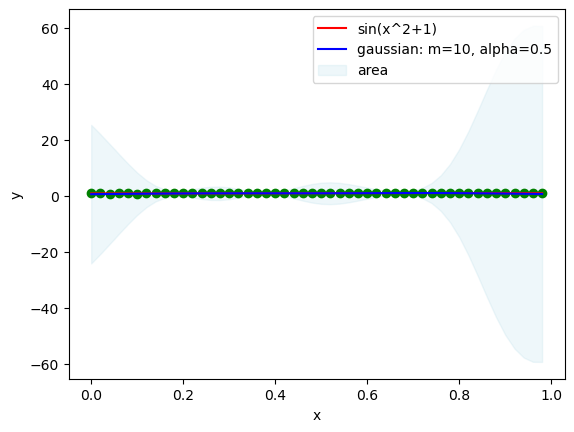

[32, 35, 19, 9, 18, 20]
5


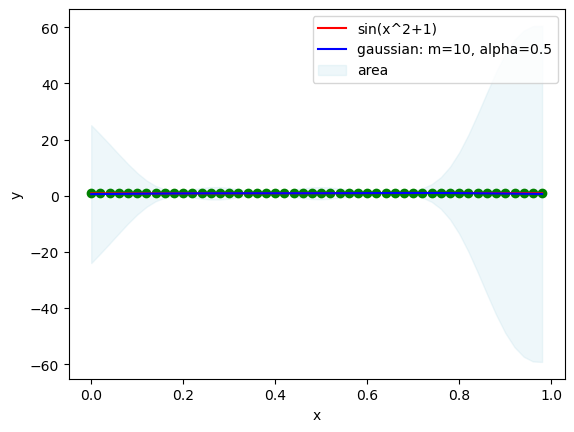

[32, 35, 19, 9, 18, 20, 30]
6


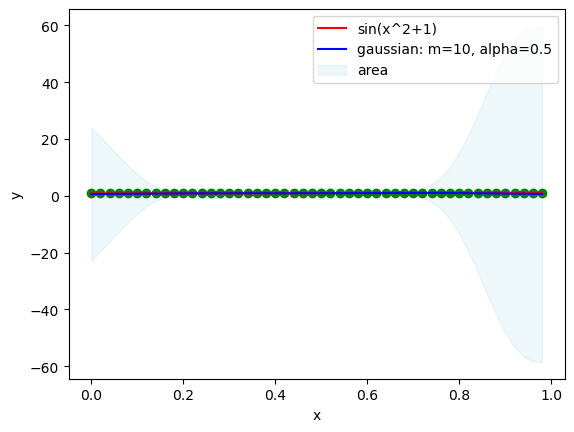

[32, 35, 19, 9, 18, 20, 30, 18]
7


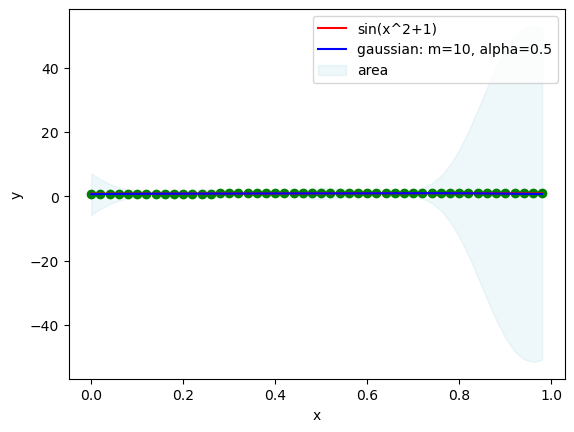

[32, 35, 19, 9, 18, 20, 30, 18, 5]
8


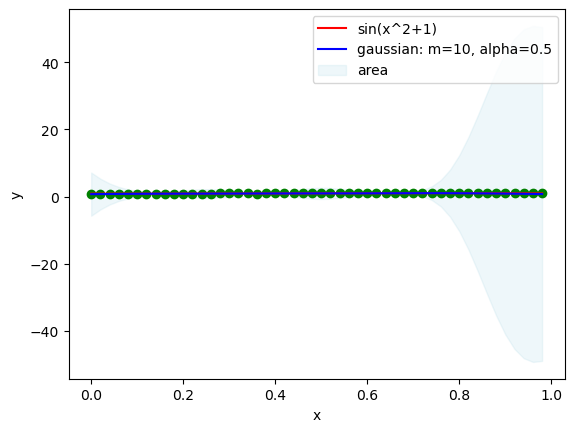

[32, 35, 19, 9, 18, 20, 30, 18, 5, 35]
9


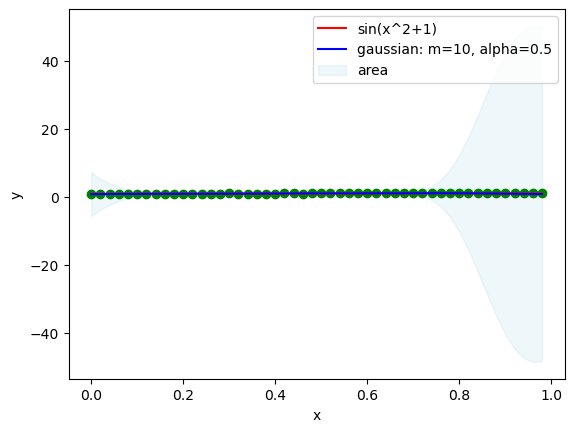

[32, 35, 19, 9, 18, 20, 30, 18, 5, 35, 28]
10


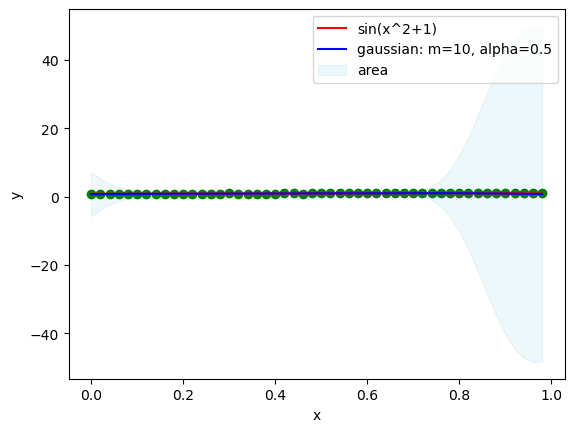

[32, 35, 19, 9, 18, 20, 30, 18, 5, 35, 28, 20]
11


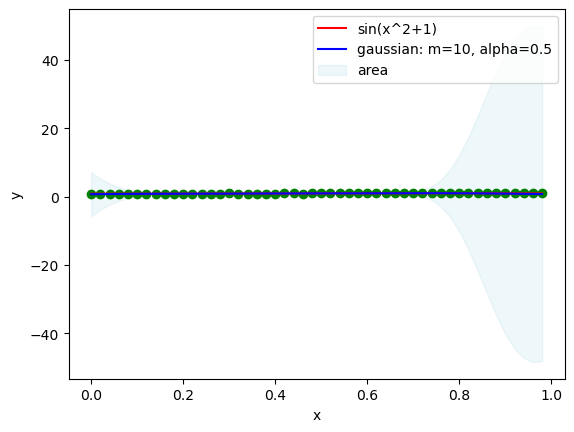

[32, 35, 19, 9, 18, 20, 30, 18, 5, 35, 28, 20, 7]
12


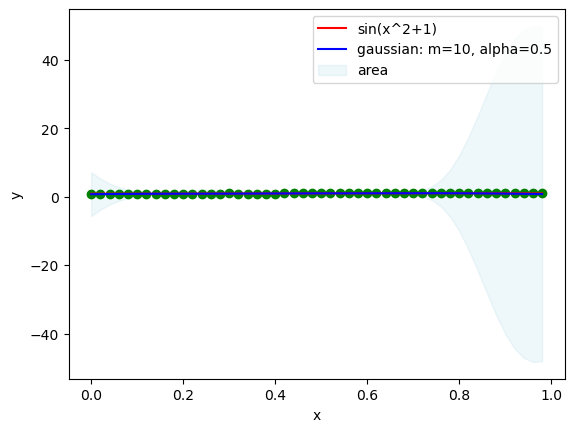

[32, 35, 19, 9, 18, 20, 30, 18, 5, 35, 28, 20, 7, 29]
13


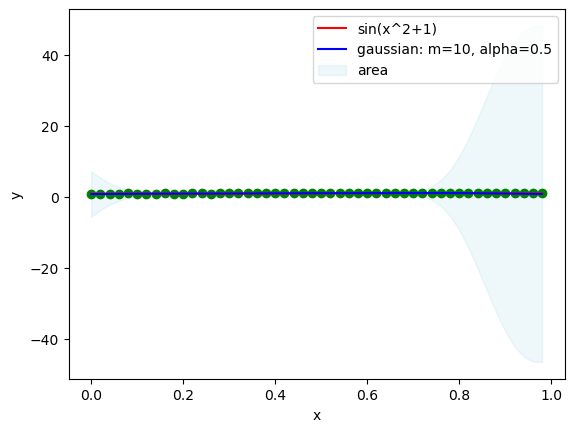

[32, 35, 19, 9, 18, 20, 30, 18, 5, 35, 28, 20, 7, 29, 25]
14


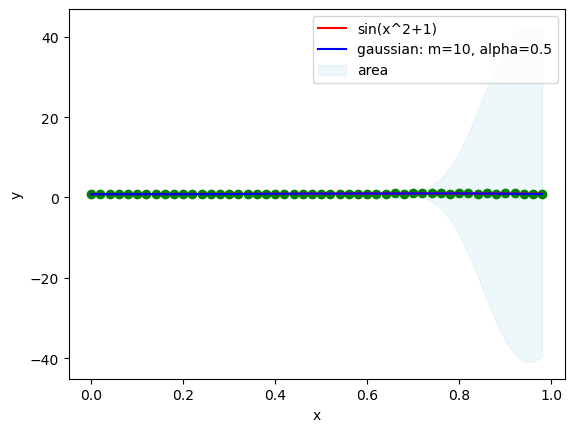

[32, 35, 19, 9, 18, 20, 30, 18, 5, 35, 28, 20, 7, 29, 25, 1]
15


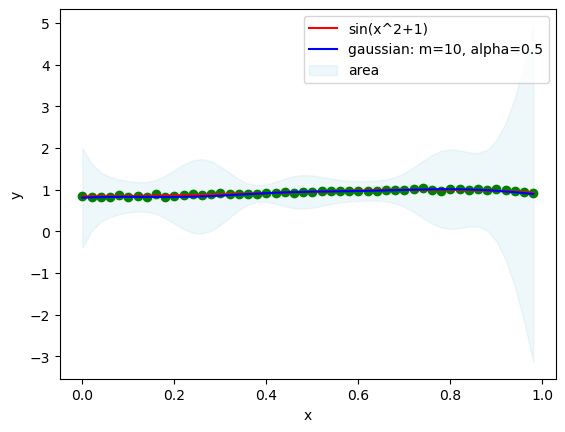

[32, 35, 19, 9, 18, 20, 30, 18, 5, 35, 28, 20, 7, 29, 25, 1, 44]
16


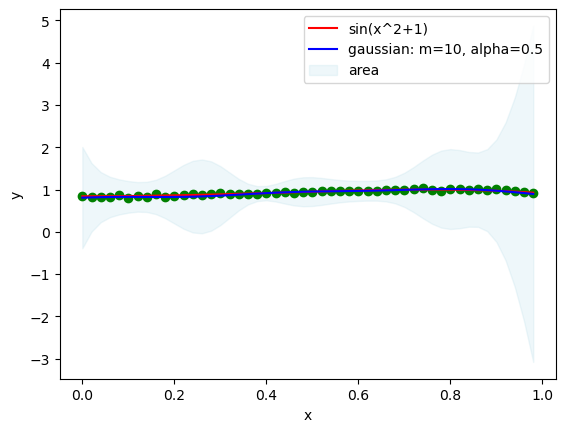

[32, 35, 19, 9, 18, 20, 30, 18, 5, 35, 28, 20, 7, 29, 25, 1, 44, 21]
17


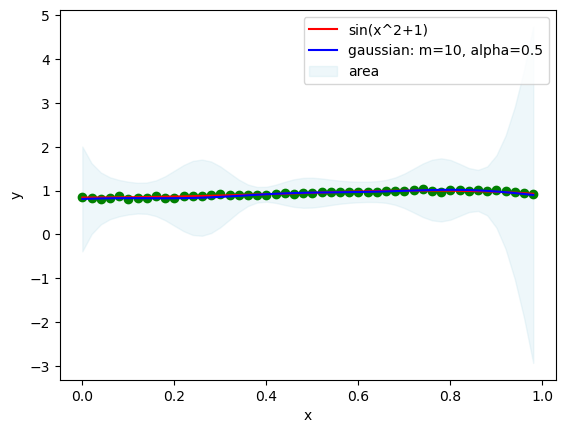

[32, 35, 19, 9, 18, 20, 30, 18, 5, 35, 28, 20, 7, 29, 25, 1, 44, 21, 43]
18


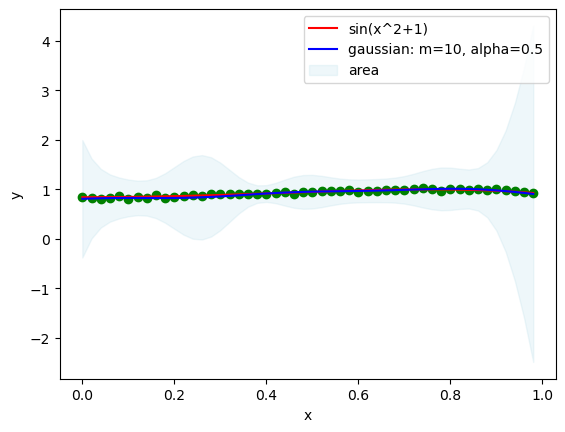

[32, 35, 19, 9, 18, 20, 30, 18, 5, 35, 28, 20, 7, 29, 25, 1, 44, 21, 43, 38]
19


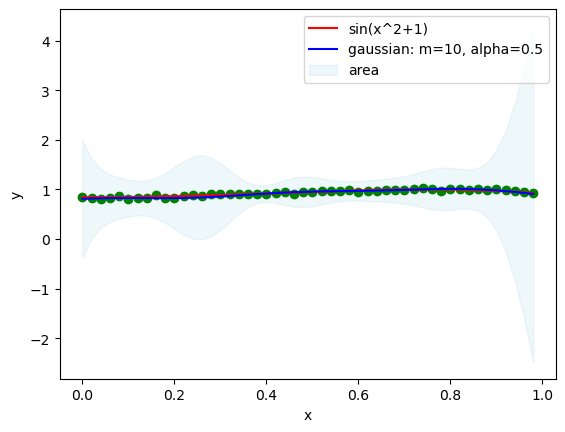

[32, 35, 19, 9, 18, 20, 30, 18, 5, 35, 28, 20, 7, 29, 25, 1, 44, 21, 43, 38, 28]
20


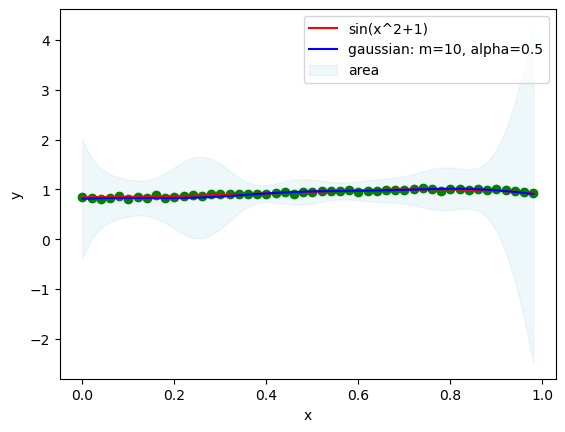

[32, 35, 19, 9, 18, 20, 30, 18, 5, 35, 28, 20, 7, 29, 25, 1, 44, 21, 43, 38, 28, 26]
21


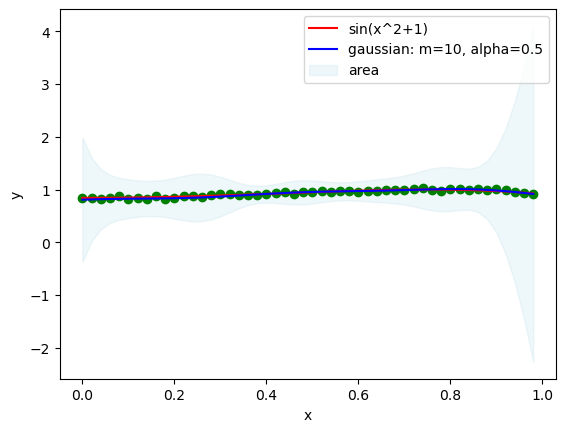

[32, 35, 19, 9, 18, 20, 30, 18, 5, 35, 28, 20, 7, 29, 25, 1, 44, 21, 43, 38, 28, 26, 13]
22


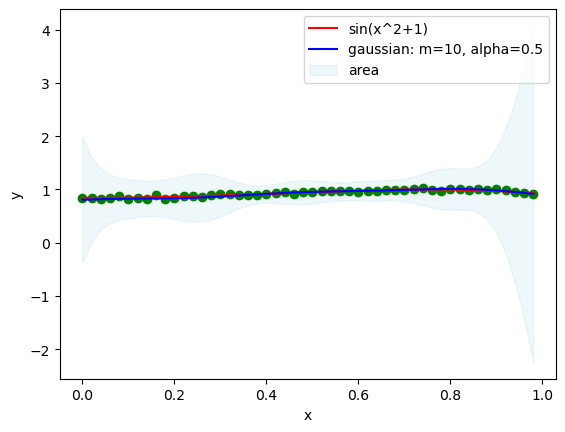

[32, 35, 19, 9, 18, 20, 30, 18, 5, 35, 28, 20, 7, 29, 25, 1, 44, 21, 43, 38, 28, 26, 13, 35]
23


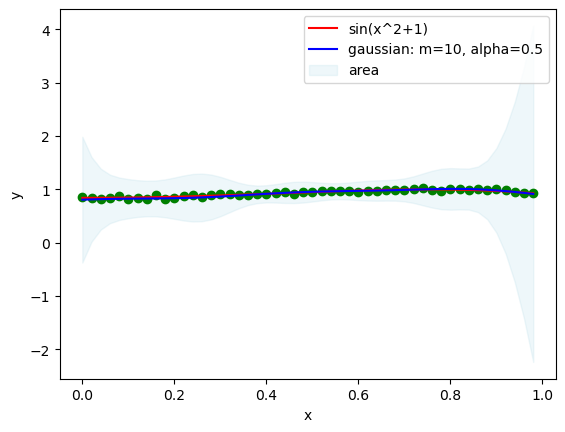

[32, 35, 19, 9, 18, 20, 30, 18, 5, 35, 28, 20, 7, 29, 25, 1, 44, 21, 43, 38, 28, 26, 13, 35, 26]
24


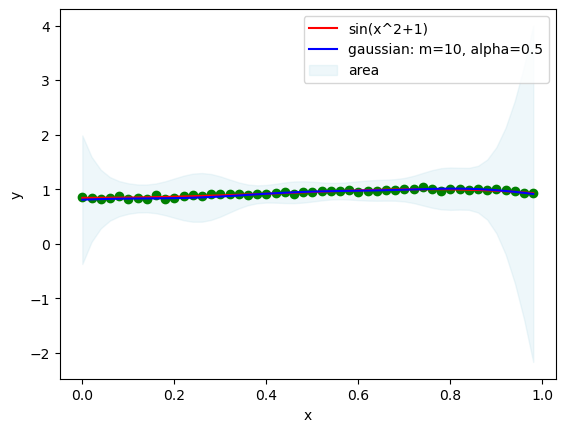

[32, 35, 19, 9, 18, 20, 30, 18, 5, 35, 28, 20, 7, 29, 25, 1, 44, 21, 43, 38, 28, 26, 13, 35, 26, 6]
25


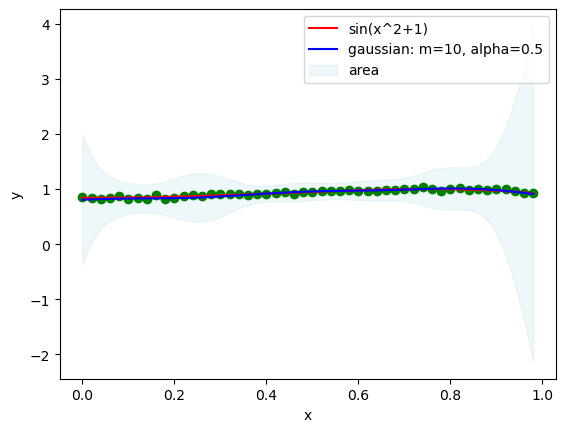

[32, 35, 19, 9, 18, 20, 30, 18, 5, 35, 28, 20, 7, 29, 25, 1, 44, 21, 43, 38, 28, 26, 13, 35, 26, 6, 22]
26


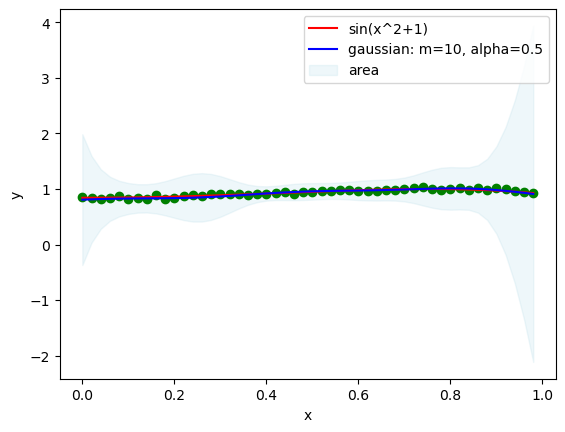

[32, 35, 19, 9, 18, 20, 30, 18, 5, 35, 28, 20, 7, 29, 25, 1, 44, 21, 43, 38, 28, 26, 13, 35, 26, 6, 22, 22]
27


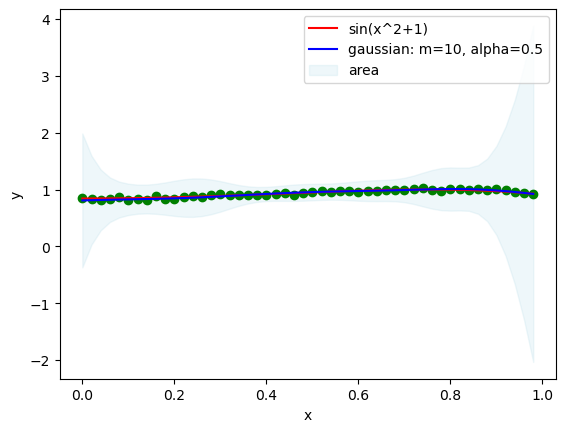

[32, 35, 19, 9, 18, 20, 30, 18, 5, 35, 28, 20, 7, 29, 25, 1, 44, 21, 43, 38, 28, 26, 13, 35, 26, 6, 22, 22, 15]
28


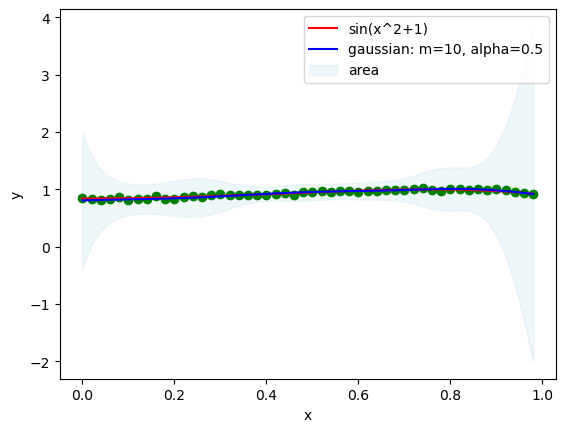

[32, 35, 19, 9, 18, 20, 30, 18, 5, 35, 28, 20, 7, 29, 25, 1, 44, 21, 43, 38, 28, 26, 13, 35, 26, 6, 22, 22, 15, 31]
29


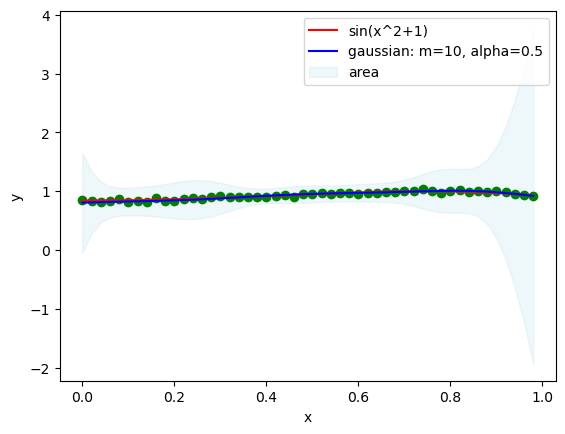

[32, 35, 19, 9, 18, 20, 30, 18, 5, 35, 28, 20, 7, 29, 25, 1, 44, 21, 43, 38, 28, 26, 13, 35, 26, 6, 22, 22, 15, 31, 2]
30


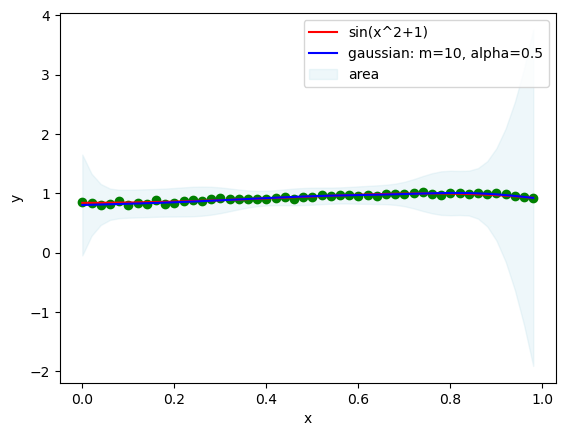

[32, 35, 19, 9, 18, 20, 30, 18, 5, 35, 28, 20, 7, 29, 25, 1, 44, 21, 43, 38, 28, 26, 13, 35, 26, 6, 22, 22, 15, 31, 2, 12]
31


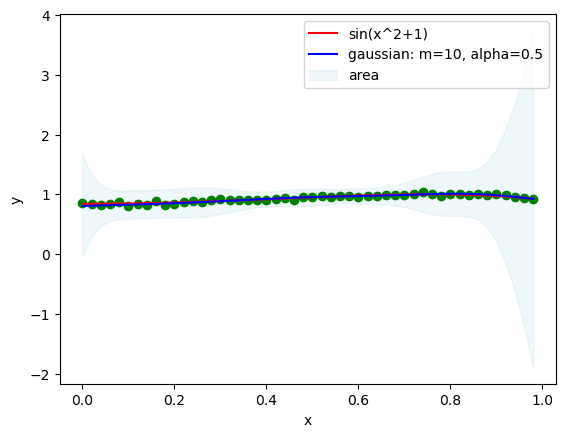

[32, 35, 19, 9, 18, 20, 30, 18, 5, 35, 28, 20, 7, 29, 25, 1, 44, 21, 43, 38, 28, 26, 13, 35, 26, 6, 22, 22, 15, 31, 2, 12, 30]
32


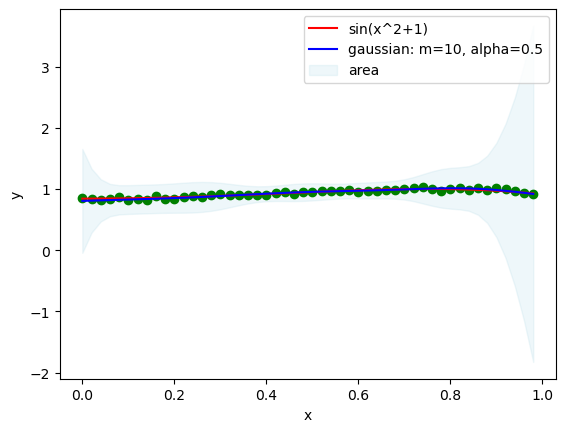

[32, 35, 19, 9, 18, 20, 30, 18, 5, 35, 28, 20, 7, 29, 25, 1, 44, 21, 43, 38, 28, 26, 13, 35, 26, 6, 22, 22, 15, 31, 2, 12, 30, 36]
33


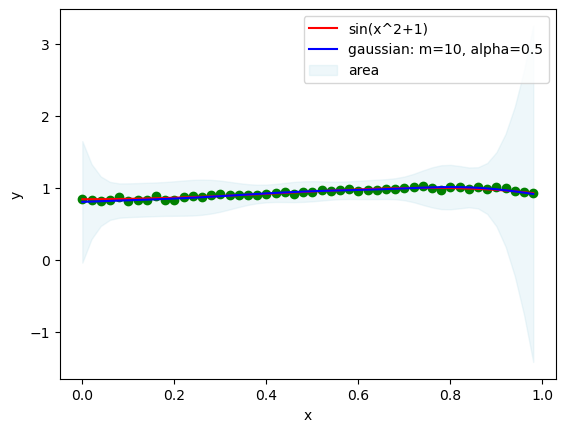

[32, 35, 19, 9, 18, 20, 30, 18, 5, 35, 28, 20, 7, 29, 25, 1, 44, 21, 43, 38, 28, 26, 13, 35, 26, 6, 22, 22, 15, 31, 2, 12, 30, 36, 44]
34


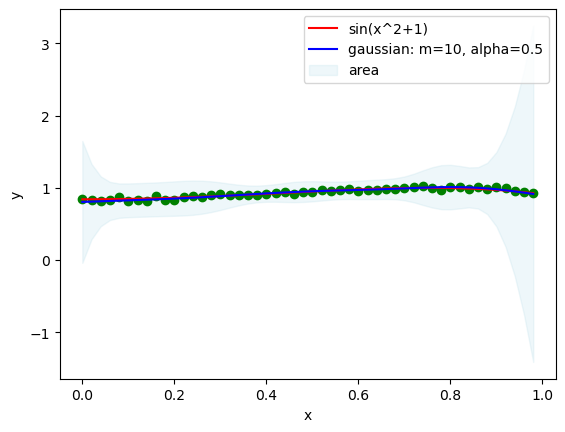

[32, 35, 19, 9, 18, 20, 30, 18, 5, 35, 28, 20, 7, 29, 25, 1, 44, 21, 43, 38, 28, 26, 13, 35, 26, 6, 22, 22, 15, 31, 2, 12, 30, 36, 44, 17]
35


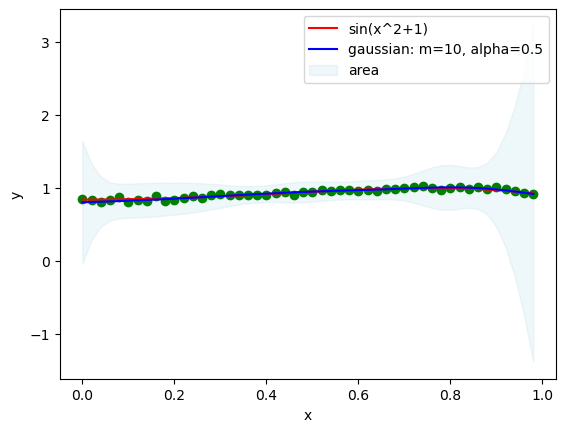

[32, 35, 19, 9, 18, 20, 30, 18, 5, 35, 28, 20, 7, 29, 25, 1, 44, 21, 43, 38, 28, 26, 13, 35, 26, 6, 22, 22, 15, 31, 2, 12, 30, 36, 44, 17, 14]
36


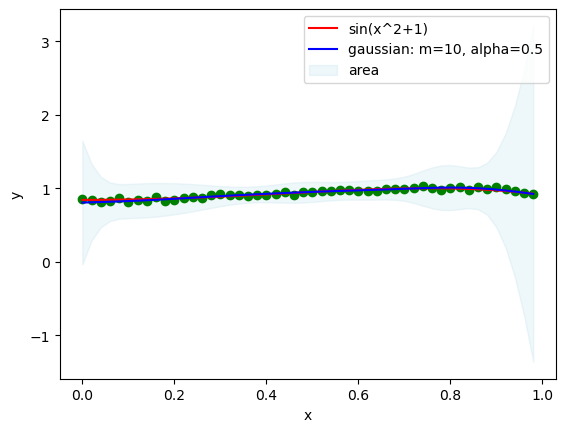

[32, 35, 19, 9, 18, 20, 30, 18, 5, 35, 28, 20, 7, 29, 25, 1, 44, 21, 43, 38, 28, 26, 13, 35, 26, 6, 22, 22, 15, 31, 2, 12, 30, 36, 44, 17, 14, 15]
37


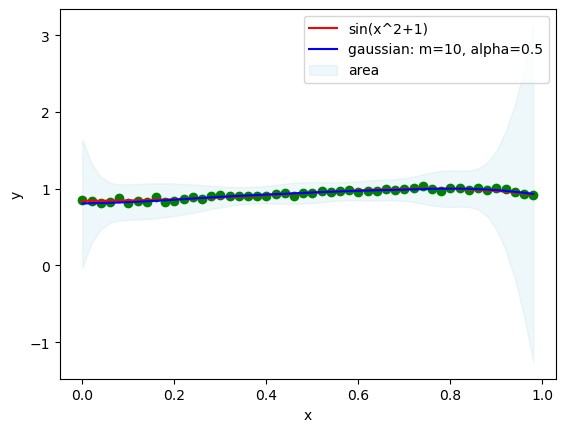

[32, 35, 19, 9, 18, 20, 30, 18, 5, 35, 28, 20, 7, 29, 25, 1, 44, 21, 43, 38, 28, 26, 13, 35, 26, 6, 22, 22, 15, 31, 2, 12, 30, 36, 44, 17, 14, 15, 39]
38


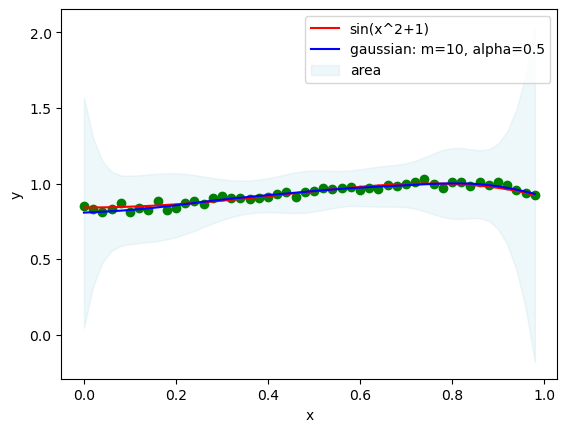

[32, 35, 19, 9, 18, 20, 30, 18, 5, 35, 28, 20, 7, 29, 25, 1, 44, 21, 43, 38, 28, 26, 13, 35, 26, 6, 22, 22, 15, 31, 2, 12, 30, 36, 44, 17, 14, 15, 39, 47]
39


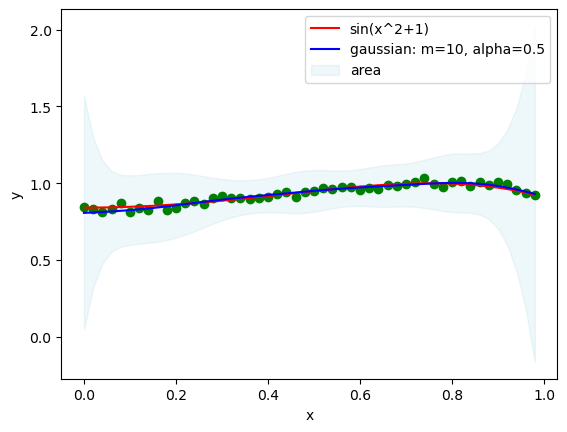

[32, 35, 19, 9, 18, 20, 30, 18, 5, 35, 28, 20, 7, 29, 25, 1, 44, 21, 43, 38, 28, 26, 13, 35, 26, 6, 22, 22, 15, 31, 2, 12, 30, 36, 44, 17, 14, 15, 39, 47, 40]
40


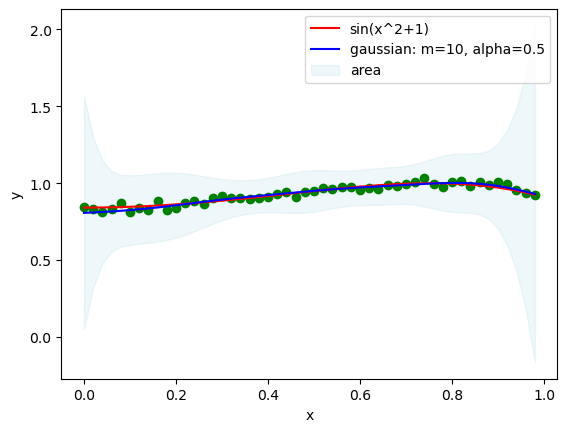

[32, 35, 19, 9, 18, 20, 30, 18, 5, 35, 28, 20, 7, 29, 25, 1, 44, 21, 43, 38, 28, 26, 13, 35, 26, 6, 22, 22, 15, 31, 2, 12, 30, 36, 44, 17, 14, 15, 39, 47, 40, 34]
41


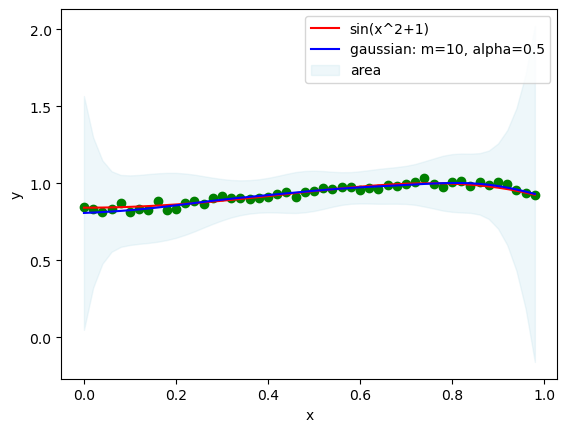

[32, 35, 19, 9, 18, 20, 30, 18, 5, 35, 28, 20, 7, 29, 25, 1, 44, 21, 43, 38, 28, 26, 13, 35, 26, 6, 22, 22, 15, 31, 2, 12, 30, 36, 44, 17, 14, 15, 39, 47, 40, 34, 29]
42


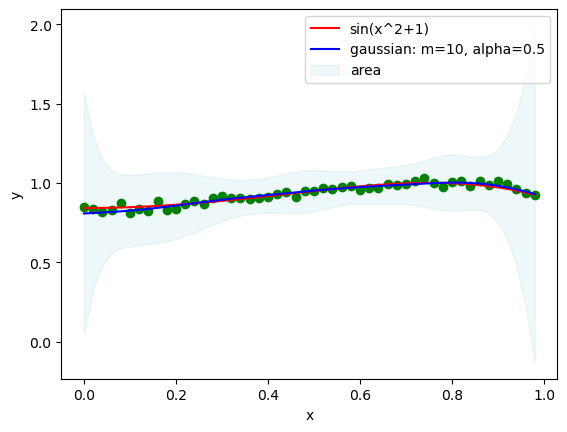

[32, 35, 19, 9, 18, 20, 30, 18, 5, 35, 28, 20, 7, 29, 25, 1, 44, 21, 43, 38, 28, 26, 13, 35, 26, 6, 22, 22, 15, 31, 2, 12, 30, 36, 44, 17, 14, 15, 39, 47, 40, 34, 29, 44]
43


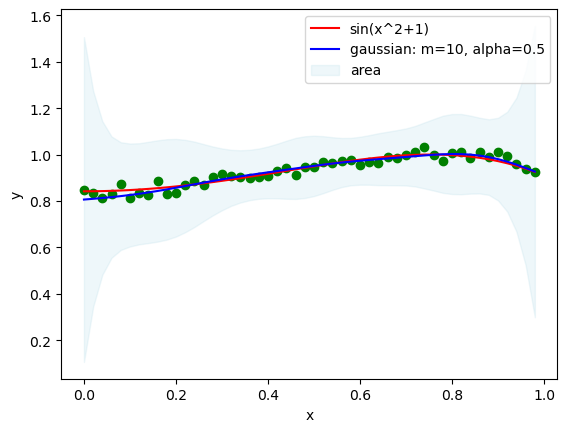

[32, 35, 19, 9, 18, 20, 30, 18, 5, 35, 28, 20, 7, 29, 25, 1, 44, 21, 43, 38, 28, 26, 13, 35, 26, 6, 22, 22, 15, 31, 2, 12, 30, 36, 44, 17, 14, 15, 39, 47, 40, 34, 29, 44, 48]
44


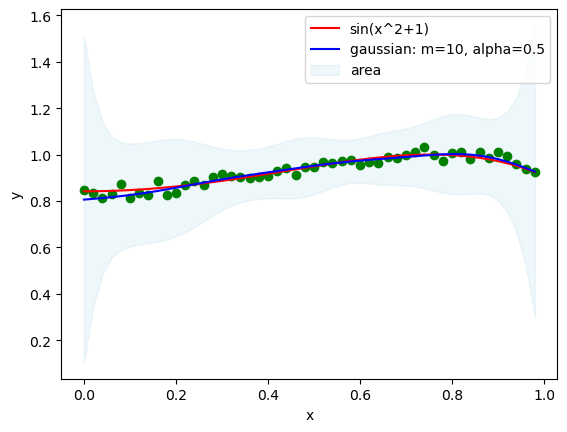

[32, 35, 19, 9, 18, 20, 30, 18, 5, 35, 28, 20, 7, 29, 25, 1, 44, 21, 43, 38, 28, 26, 13, 35, 26, 6, 22, 22, 15, 31, 2, 12, 30, 36, 44, 17, 14, 15, 39, 47, 40, 34, 29, 44, 48, 28]
45


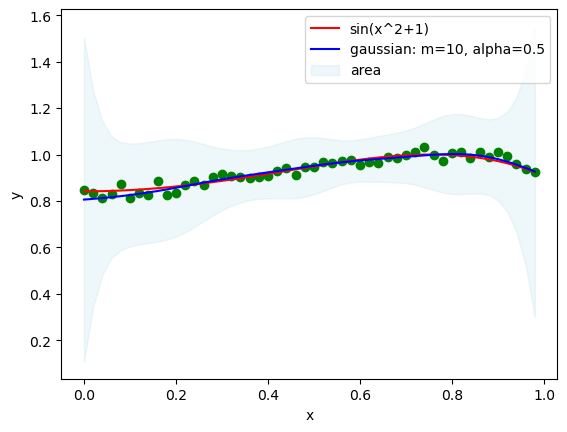

[32, 35, 19, 9, 18, 20, 30, 18, 5, 35, 28, 20, 7, 29, 25, 1, 44, 21, 43, 38, 28, 26, 13, 35, 26, 6, 22, 22, 15, 31, 2, 12, 30, 36, 44, 17, 14, 15, 39, 47, 40, 34, 29, 44, 48, 28, 33]
46


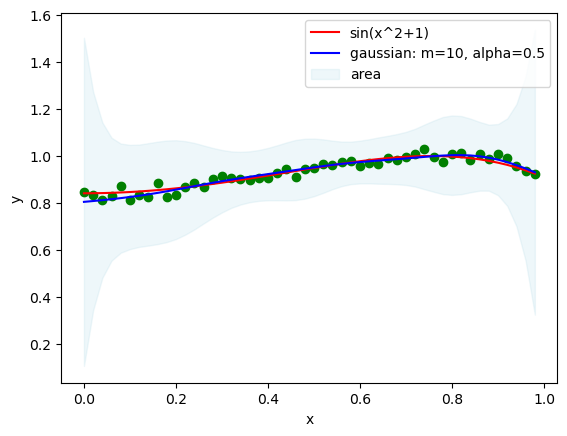

[32, 35, 19, 9, 18, 20, 30, 18, 5, 35, 28, 20, 7, 29, 25, 1, 44, 21, 43, 38, 28, 26, 13, 35, 26, 6, 22, 22, 15, 31, 2, 12, 30, 36, 44, 17, 14, 15, 39, 47, 40, 34, 29, 44, 48, 28, 33, 45]
47


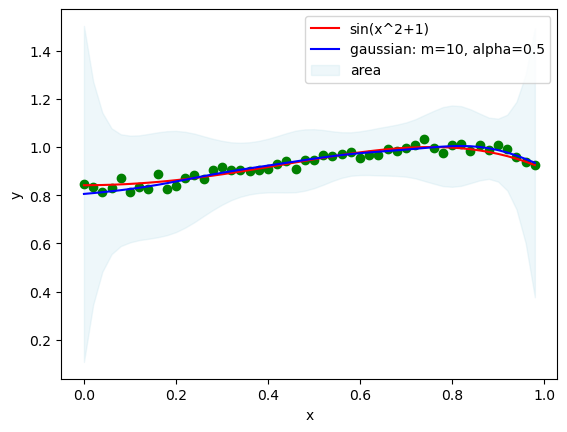

[32, 35, 19, 9, 18, 20, 30, 18, 5, 35, 28, 20, 7, 29, 25, 1, 44, 21, 43, 38, 28, 26, 13, 35, 26, 6, 22, 22, 15, 31, 2, 12, 30, 36, 44, 17, 14, 15, 39, 47, 40, 34, 29, 44, 48, 28, 33, 45, 46]
48


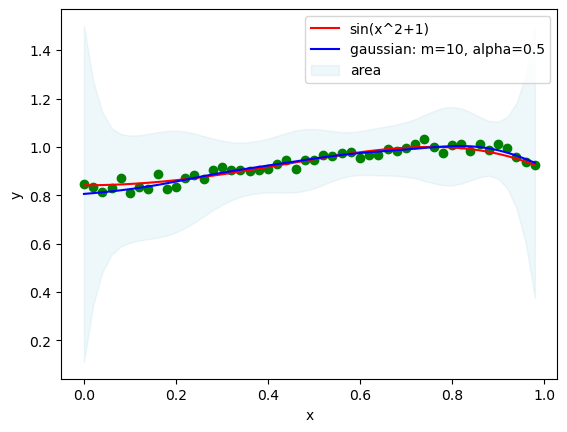

[32, 35, 19, 9, 18, 20, 30, 18, 5, 35, 28, 20, 7, 29, 25, 1, 44, 21, 43, 38, 28, 26, 13, 35, 26, 6, 22, 22, 15, 31, 2, 12, 30, 36, 44, 17, 14, 15, 39, 47, 40, 34, 29, 44, 48, 28, 33, 45, 46, 44]
49


In [348]:
def display_distribution(m, alpha, x, y_, y_origin, y_noise, area, line_name, origin_func):
    fig, ax = plt.subplots()
    line1, = ax.plot(x, y_origin, color='red', label=f'{origin_func}')
    line2, = ax.plot(x, y_, color='blue', label=f'{line_name}: m={m}, alpha={alpha}')

    # 固定置信区间的上下界
    lower_bound = -1
    upper_bound = 5

    # 使用plt.fill_between填充置信区间
    plt.fill_between(x, y_ + area, y_ - area, alpha=0.2, color='lightblue', label='area')

    # 在区间内添加竖线
    # plt.axvline(x.all(), color='blue', linestyle='--', label='竖线')
    ax.legend()
    # ax.set_title('Linear and Quadratic Functions')
    ax.set_xlabel('x')
    ax.set_ylabel('y')

    plt.scatter(x, y_noise, color='green')
    plt.show()


x_arr = []
y_noise_arr = []
i_arr = []

x, y_origin, y_noise, sub_y = get_data(nodes, mu, var, 1.0, p_1)

for i in range(0, 50):
    index = random.randint(0, 49)
    i_arr.append(index)
    # x_arr.append(x[index])
    # y_noise_arr.append(y_noise[index])
    w_, _, ss = full_bayesian_mine(m, alpha, x[i_arr], y_noise[i_arr], var, gaussian, 1.0)
    y_ = X @ w_
    var_x = []
    for el in X:
        var_x.append(el.T @ ss @ el)
    var_x += sub_y ** 2
    display_distribution(m, alpha, x, y_, y_origin, y_noise, var_x, 'gaussian', 'sin(x^2+1)')
    print(i_arr)
    print(i + 1)